In [21]:
from scipy import integrate
from scipy.optimize import fsolve
from math import pi, e, cos, sin
import numpy as np
from IPython.display import display, Markdown
import pandas as pd
import matplotlib.pyplot as plt
#tis is only style for the plot, we can ignore or change if we want
rc_fonts = {
        "text.usetex": True,
        "font.size": 30,
        'mathtext.default': 'regular',
        'axes.titlesize': 33,
        "axes.labelsize": 33,
        "legend.fontsize": 30,
        "xtick.labelsize": 30,
        "ytick.labelsize": 30,
        'figure.titlesize': 33,
        'figure.figsize': (13,11),
        'text.latex.preamble': [r'\usepackage{amsmath,amssymb,bm,physics,lmodern}'],
        "font.family": "serif",
        "font.serif": "computer modern roman",
        }

plt.rcParams.update(rc_fonts)

/home/roberto/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


## Find the effective thickness of the photoevaporation flow

To calculate $h_0$  we use the equation for [r](https://github.com/will-henney/globule-seminario/issues/5#issuecomment-1438984643) and $rho$ $$\frac{\rho}{\rho_0}=e^{\frac{1-M^2}{2}}$$ and $$\frac{r}{r_0}=M^{-1/\alpha}e^{\frac{M^2-1}{2 \alpha}}$$
hence
$$\frac{dr}{dM}=r_0\Big( e^{\frac{M^2-1}{2\alpha}}\Big(-\frac{M^{-1/\alpha-1}}{\alpha}+\frac{M}{\alpha M^{1/\alpha}}\Big)\Big)=\frac{r_0}{\alpha}e^{\frac{M^2-1}{2\alpha}}\Big(M^{\frac{\alpha-1}{\alpha}}-M^{-\frac{\alpha+1}{\alpha}}\Big)$$
therefore
$$h_0=\int_0^\infty \Big(\frac{n(r)}{n_0}\Big)^2 dr=\int_1^\infty \frac{r_0}{\alpha} (exp(1-M^2))^{1-\frac{1}{2\alpha}}\Big(M^{\frac{\alpha-1}{\alpha}}-M^{-\frac{\alpha+1}{\alpha}}\Big) dM.$$

For $\alpha=2$ we have $$h_0=r_0\int_1^\infty \frac{exp(\frac{3}{4}(1-M^2))}{2}(M^{1/2}-M^{-3/4})dM$$

In [2]:
def alpha_values(alpha): #integrate in function of alpha
    function = lambda x: ((e**(1-x**2))**(1-1/(2*alpha)))*(x**((alpha-1)/alpha)-x**(-(alpha+1)/alpha))/alpha
    return(function)
 
h_0, err = integrate.quad(alpha_values(2), 1, np.inf) #alpha=2 spherical case
display(Markdown(rf'The values of $h_0/r_0$ for $\alpha=2$ is'))
display(Markdown(rf'$h_0/r_0=$'f'{h_0}'))

The values of $h_0/r_0$ for $\alpha=2$ is

$h_0/r_0=$0.12149200100709526

Now for the cylindrical case $\alpha=1$ and we have $$h_0=r_0\int_1^\infty \Big(exp(1-M^2)\big)^{1/2}\Big(1-M^{-2}\Big) dM$$

In [3]:
h_0_cyl, err = integrate.quad(alpha_values(1), 1, np.inf) #alpha=1 cylindrical case
display(Markdown(rf'The values of $h_0/r_0$ for $\alpha=1$ is'))
display(Markdown(rf'$h_0/r_0=$'f'{h_0_cyl}'))

The values of $h_0/r_0$ for $\alpha=1$ is

$h_0/r_0=$0.311359084837597

## Properties of the shocked shell for photoevaporation flow that interacts with an ambient pressure

We investigate a range of pressure contrasts $P / P_0$ between the ambient gas and the base of the photoevaporatoin flow. 

In [4]:
P_P_0_1 = [i+2 for i in range(14)]  #P/P_0 decrease to 0
Extr=[1/0.9,1/0.8,1/0.7,1/0.6]      #case when P/P_0 is near of 1
P_P_0 = 1 / np.array(Extr + P_P_0_1)
pd.DataFrame(P_P_0)#.style.format(precision=2)

,0
0,0.900000
1,0.800000
2,0.700000
3,0.600000
4,0.500000
5,0.333333
6,0.250000
7,0.200000
8,0.166667
9,0.142857


Find the Mach number of the flow at radius where the shocked shell will form, assuming that the flow ram pressure is equal to the ambient pressure. 

Now we use the pressure equation to find the mach number

$$\frac{P}{P_0}=\frac{1+M^2}{2}exp\Big(\frac{1-M^2}{2}\Big)$$

In [5]:
def func_to_find_M0(x):
    """Should be called with vector argument of same length as P_P_0"""
    return ((1+x**2)/2)*(e**((1-x**2)/2)) - P_P_0 #equation to find the root

M0 = fsolve(func_to_find_M0, 1.5 * np.ones_like(P_P_0)) 
#we find the mach number to differents ratio of P/P_0
M0

array([1.43653166, 1.62750626, 1.78737193, 1.93722551, 2.0872695 ,
       2.36189814, 2.52690899, 2.64359919, 2.73319847, 2.80555349,
       2.86601589, 2.91780729, 2.96301204, 3.00305324, 3.03894401,
       3.07143012, 3.10107584, 3.12831796])

Find the other parameters of the shocked shell: $r_1 / r_0$, $n_1 / n_0$ (density just before shock). 

The equations for $r_1$ and $\rho_1$ are $$\frac{\rho_1}{\rho_0}=e^{\frac{1-M^2}{2}}$$ and $$\frac{r_1}{r_0}=M^{-1/\alpha}e^{\frac{M^2-1}{2 \alpha}}$$

We will make numpy arrays for all the quantities that we want to calculate. The dataframe will be used only for presentation.

In [6]:
alpha=2      #spherical case
rho1 = np.exp((1-M0**2)/2)
r1 = (M0**(-1/alpha))*np.exp((M0**2-1)/(2*alpha))

In [7]:
Table1 = pd.DataFrame(
    {
        r'$P_1/P_0$': P_P_0,
        r'$M_0$': M0,
        r'$\rho_1/\rho_0$': rho1,
        r'$r_1/r_0$': r1,
    }
)
Table1#.style.format(precision = 2)

,$P_1/P_0$,$M_0$,$\rho_1/\rho_0$,$r_1/r_0$
0,0.900000,1.436532,0.587540,1.088488
1,0.800000,1.627506,0.438503,1.183729
2,0.700000,1.787372,0.333755,1.294729
3,0.600000,1.937226,0.252480,1.429868
4,0.500000,2.087270,0.186682,1.601988
5,0.333333,2.361898,0.101339,2.043998
6,0.250000,2.526909,0.067702,2.417705
7,0.200000,2.643599,0.050071,2.748578
8,0.166667,2.733198,0.039353,3.049133
9,0.142857,2.805553,0.032207,3.326705


Find the properties of the shocked shell itself (density and thickness): $n_2 / n_0$, $h_2 / h_0$. 

For density we have that in the shock shell  from $\rho_1 M_1=\rho_2M_2$, where $M_2=M_1^{-1}$, therefore
$$\frac{\rho_2}{\rho_0}=(\rho_2/\rho_1)(\rho_1/\rho_0)=M_1^2(\rho_1/\rho_0)$$

and for $h_2/h_0$ we have that in  the shock shell $h_2/r_1=\frac{3}{4M_1^2}$ hence
$$\frac{h_2}{r_0}=(h_2/r_1)(r_1/r_0)=\frac{3}{4M_1^2}\frac{r_1}{r_0}$$

In [8]:
rho2 = (M0**2)*rho1
h2 = (3/(4*M0**2)) * r1

In [9]:
Table2=pd.DataFrame()
Table2[rf'$P_1/P_0$'] = P_P_0
Table2[rf'$M_0$'] = M0
Table2[rf'$\rho_2/\rho_0$'] = rho2
Table2[rf'$h_2/r_0$'] = h2
Table2

,$P_1/P_0$,$M_0$,$\rho_2/\rho_0$,$h_2/r_0$
0,0.900000,1.436532,1.212460,0.395599
1,0.800000,1.627506,1.161497,0.335172
2,0.700000,1.787372,1.066245,0.303956
3,0.600000,1.937226,0.947520,0.285757
4,0.500000,2.087270,0.813318,0.275780
5,0.333333,2.361898,0.565327,0.274802
6,0.250000,2.526909,0.432298,0.283978
7,0.200000,2.643599,0.349929,0.294970
8,0.166667,2.733198,0.293980,0.306123
9,0.142857,2.805553,0.253507,0.316985


## Emission measure of shocked shell

This has two parts:
1. The emission measure in the radial direction, which is needed in order to know the contriibution of the recombinations in shell to the ionization balance
2. The emission measure in the tangential direction, which is proportional to the surface brightness. 

For the radial case, we have $EM_2 / EM_0 = (n_2 /  n_0)^2 (h_2 / h_0)$

In [10]:
EM2a = (rho2)**2 * h2 / h_0
EM2a

array([4.78676505, 3.72183091, 2.84430994, 2.11166761, 1.50153727,
       0.72288947, 0.43682099, 0.29729637, 0.21776325, 0.167676  ,
       0.13386463, 0.10984048, 0.09208475, 0.07854548, 0.06795595,
       0.05949741, 0.0526202 , 0.04694343])

For the tangential case, we have the following:


The emission measure is $EM=n^2\ell$ where $\ell=2(hr)^{1/2}$
and therefore the relative emission is $$\frac{EM_2}{EM_0}=\Big(\frac{n_2}{n_0}\Big)^2\frac{\ell_1}{\ell_2}$$ 
here we use that in our data $r_1$ and $\rho_1$ are normalized by $r_0$ and $\rho_0$ but for $h_2$ is normalized by $r_0$ and not by $h_0$, but in our calculation we find that $h_0\approx 0.12r_0$  hence $\frac{h_1}{r_0}=0.12(\frac{h_2}{h_0})$ and we have

In [11]:
h_0

0.12149200100709526

In [12]:
EM2=(rho2)**2*(r1*h2/h_0)**(1/2)
EM2

array([2.76758218, 2.43793721, 2.04613867, 1.64645152, 1.2614146 ,
       0.68718911, 0.44425908, 0.31632129, 0.23955154, 0.18933577,
       0.15441435, 0.12899184, 0.10981567, 0.09493523, 0.08311767,
       0.07354987, 0.06567622, 0.05910564])

## Display tall the results in a single table

In [13]:
df = pd.DataFrame(
    {
        r'$P_1/P_0$': P_P_0,
        r'$M_0$': M0,
        r'$\rho_1/\rho_0$': rho1,
        r'$r_1/r_0$': r1,
        r'$\rho_2/\rho_0$': rho2,
        r'$h_2/r_0$': h2,
        r'$E_2/E_0$': EM2a,
        r'$S_2/S_0$': EM2,
    }
)
df

,$P_1/P_0$,$M_0$,$\rho_1/\rho_0$,$r_1/r_0$,$\rho_2/\rho_0$,$h_2/r_0$,$E_2/E_0$,$S_2/S_0$
0,0.900000,1.436532,0.587540,1.088488,1.212460,0.395599,4.786765,2.767582
1,0.800000,1.627506,0.438503,1.183729,1.161497,0.335172,3.721831,2.437937
2,0.700000,1.787372,0.333755,1.294729,1.066245,0.303956,2.844310,2.046139
3,0.600000,1.937226,0.252480,1.429868,0.947520,0.285757,2.111668,1.646452
4,0.500000,2.087270,0.186682,1.601988,0.813318,0.275780,1.501537,1.261415
5,0.333333,2.361898,0.101339,2.043998,0.565327,0.274802,0.722889,0.687189
6,0.250000,2.526909,0.067702,2.417705,0.432298,0.283978,0.436821,0.444259
7,0.200000,2.643599,0.050071,2.748578,0.349929,0.294970,0.297296,0.316321
8,0.166667,2.733198,0.039353,3.049133,0.293980,0.306123,0.217763,0.239552
9,0.142857,2.805553,0.032207,3.326705,0.253507,0.316985,0.167676,0.189336


The column $E_2/E_0$ is for the perpendicular emission measure, while $S_2/S_0$ is for the tangential emission measure.

In [14]:
pd.__version__

'1.1.3'

*Roberto, please make a plot of these quantities, using the shell radius as the indendent variable*. 

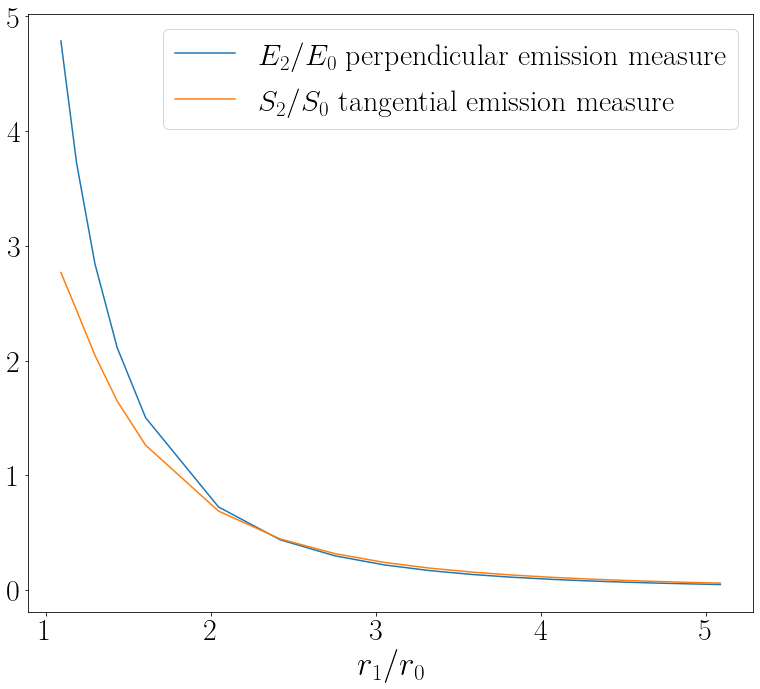

In [24]:
plt.plot(r1,EM2a,label=r'$E_2/E_0$ perpendicular emission measure ')
plt.plot(r1,EM2,label=r'$S_2/S_0$ tangential emission measure ')
plt.xlabel(r'$r_1/r_0$')
plt.legend()
plt.show()

# Data for LDN 1616

In our [discussion](https://github.com/will-henney/globule-seminario/issues/1) we found that the closer star thata can ionized LDN 1616 are Singma Ori and Eps Ori that have an ionized flux incident of $Q_0=7.59\times 10^{47}s^{-1}$ and $Q_0=6\times10^{48}s^{-1}$ respectively (to obtain this value for Eps Ori we extrapolate the data from [Martins](https://ui.adsabs.harvard.edu/abs/2005A%26A...436.1049M/abstract)). We focus only in Eps Ori because is an orde higher than Sigma Ori. 

Now to estimate the ionizing flux incident we need to find the angular distance usind the data in astropy and then we calculate the distance between the stars and LDN 1616.

In [15]:
from astropy.coordinates import SkyCoord #import astropy and numpy
import numpy as np
import astropy.units as u #import the units

#we obtain the coordinates from SkyCoord 
eps_ori = SkyCoord.from_name('eps ori')      #epsilon Ori coordinates
LDN_1616 = SkyCoord.from_name('LDN 1616')    #LDN 1616 coordinates

separation = eps_ori.separation(LDN_1616)   #we obtain the separation angular between eps Ori and LDN 1616
print('the separation angular is:')       
separation                                  #this separation is in degrees

the separation angular is:


<Angle 7.60726434 deg>

For the distance we supouse that LDN 1616 and Epsi Ori are at the same distance, nad for the distance we use $400 pc$ that is the distance to Orion OB stars. 
Using geometry we have that de distance from Epsi Ori to LDN 1616 is $D=2d\sin(\theta/2)$ and we have

In [16]:
d=distance = 400*u.pc # distance to Orion OB stars
Distance = 2*distance*np.sin((separation).value*np.pi/(180*2)) #Distance
Distance

<Quantity 53.06972339 pc>

For the ionizing flux incident now we use $F=\frac{L}{4\pi D^2}$ using $Q_0$, and we have

In [17]:
Q0_eps = 6.0e48/(1*u.second)   #Q_0 for epsilon Ori (photons/s)
Q0_sig = 7.59E47/(1*u.second)  #Q_0 for sigma Ori (photons/s)

flux_io_eps = Q0_eps/(4*np.pi*Distance**2)
flux_io_sig = Q0_sig/(4*np.pi*Distance**2)

display(Markdown(r'The ionizing flux of $'r'\epsilon$ Ori is 'f'{flux_io_eps} and for $'r'\sigma$ Ori the ionizing flux is 'f'{flux_io_sig}'))

The ionizing flux of $\epsilon$ Ori is 1.6953045922016264e+44 1 / (pc2 s) and for $\sigma$ Ori the ionizing flux is 2.1445603091350573e+43 1 / (pc2 s)

Again, we note that the ionizng flux for sigma Ori is an order less than eps Ori.

Now, for the radius of LDN 1616 we can see in the [image](https://github.com/will-henney/globule-seminario/issues/1#issuecomment-1414493501) that the angular radius is .2° and again, using the same geometry with a discance of 384 pc ([Pliyali](https://ui.adsabs.harvard.edu/abs/2022MNRAS.513.2039S)) we have

In [18]:
angular_radius_LDN_1616 = 0.2*u.degree  #diameter of LDN 1616
distance_globule = 384*u.pc             #distance to LDN 1616
globule_radius = distance_globule*np.sin((angular_radius_LDN_1616.value)*np.pi/180)
print('The globule radius in pc is:',globule_radius)

The globule radius in pc is: 1.3404101434459132 pc


To calculate the density we considered two terms, 
the advection of new atoms through the ionization front,  $n_0u_0$, and the re-combinations in the ionized flow,
$\int n^2\alpha_\beta dr=n_0^2h\alpha_\beta$. So we use $F_0=n_0 u_0+n_0^2 h\alpha_\beta$ to compute the ionized density $n_0$, where $u_0$ is the gas velocity, we use $10 km/s$, $h$ is the effective thickness, we take $h=0.1r_0$ where $r_0$ is the globule radius.

Therefore to compute the ionized density we resolved our quadratic function $n_0^2(h\alpha_\beta)+n_0(u_0)-F_0=0$
and we take only the positive solution, so the solution is $$n_0=\frac{-u_0+\sqrt{u_0^2+4h\alpha_\beta F_0}}{2h\alpha_\beta}$$

*Also mention the possible contribution of recombinations in the shocked shell*

In [19]:
#values that we considered
h = 0.1 * globule_radius.to('cm')           #The effective thickness
alpha_beta = 2.3E-13 * u.cm**3 / (u.second) #The recombination coefficient
u_0 = 10 * u.kilometer / (u.second)         #The gas velocity
cm_s = u.cm / u.second                      #convert the gas velocity to cgs
cms = (u.cm**2 *u.second)**(-1)             # units for cgs
F_0 = flux_io_eps.to(cms)                   #flux ionizing for epsilon Ori
#coefficients to solve the qudratic function
a = h*alpha_beta
b = u_0.to(cm_s)
c = -F_0
n_0 = (-b+(b**2-(4*a*c))**(1/2))/(2*a)
n_0

<Quantity 9.39983214 1 / cm3>

_Now what happened if we considered only one of the tow terms?_

_If we only take the advection term then the ionized density is_ $n_0=\frac{F_0}{u_0}$


_And similarly if we only take the re-combinations in the ionized flow then the ionized density is_ $n_0=\sqrt{\frac{F_0}{h\alpha_\beta}}$ _and we have_

In [20]:
adv_term = F_0/(u_0.to(cm_s))
rec_term = (F_0/(h*alpha_beta))**(1/2)
display(Markdown(r'The density only cosidered the advection term is $'r'n_{0,adv}$ = 'f'{adv_term} and iif we only considere the re-combination term then $'r'n_{0,rec}$ = 'f'{rec_term}'))

The density only cosidered the advection term is $n_{0,adv}$ = 17.80519145831026 1 / cm3 and iif we only considere the re-combination term then $n_{0,rec}$ = 13.680919281702542 1 / cm3

## Alternative estimate of density from H$\alpha$ surface brightness

For the emission measure we have that $EM=n_o^2\ell$, therefore $$n_0=\sqrt{\frac{EM}{\ell}}$$ and using data of an [image](https://github.com/will-henney/globule-seminario/issues/3#issuecomment-1416062507) we have an Intensity of 30 in Rayleigh, so we need change to EM and we have

$$I=\int \frac{f_{H_\alpha}\alpha_\beta n_e n_p}{4\pi}dz=\frac{f_{H_\alpha}\alpha_\beta}{4\pi}EM_{cm^{-5}}=\frac{f_{H_\alpha}\alpha_\beta(1\frac{pc}{cm})}{4\pi}EM_{cm^{-5}pc}$$ using typical values we have $f_{H_\alpha}\alpha_\beta\approx 1.17\times10^{-13}$ therefore
$$\frac{I}{cgs}=\frac{1.17\times10^{-13}3.086\times10^{18}}{4\pi}EM=\frac{3.61\times10^{5}}{4\pi}EM$$
and in Rayleighs we have that $$1 Ry=\frac{10^6}{4\pi} photons/s/cm^2/str$$
in units of cgs, finally we have that $$\frac{I}{Ry}=\frac{4\pi}{10^6}\frac{3.61\times10^5}{4\pi}EM=0.36EM$$
$$\Rightarrow EM=2.77\frac{I}{Ry}.$$

For $\ell$ we use $$\ell=\Big(\frac{2}{\sqrt{10}}\Big)r_o,$$ tehrefore

In [28]:
n0_LDN=np.sqrt((2.77*30)/(2/np.sqrt(10)))
print('the density that we obser is', n0_LDN, 'cm^{-3}')

the density that we obser is 11.462662726434733 cm^{-3}


## Pressure contrast between the photoevaporation flow and the hot ambient gas